<a href="https://colab.research.google.com/github/hieu1210/airbnb/blob/main/NYC_AirBnB_Project_%5Bwith_Trinh%5D_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBNB Project

## Setup

In [ ]:
#@title Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install geojson

In [ ]:
import pandas as pd
import gzip
import json
import geojson

In [ ]:
# @title Download the data to Google Drive (don't need to do it again)
# Download the .gz file
# #Paris
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"
# ! wget  "http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Paris"

# #Barcelona
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"
# ! wget  "http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Barcelona"

# #Tokyo
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"
# ! wget  "http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-12-28/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Tokyo"

# # Bangkok
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"
# ! wget  "http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Bangkok"

# #Sydney
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"
# ! wget  "http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Sydney"

# # New Zealand
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"
# ! wget  "http://data.insideairbnb.com/new-zealand/2021-12-15/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New Zealand"

# # Toronto
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"
# ! wget  "http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Toronto"

# # New York
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"
# ! wget  "http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/New York"

# #Los Angeles
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"
# ! wget  "http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Los Angeles"

# #London
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"
# ! wget  "http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/London"

# #Melbourne
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/data/listings.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/data/calendar.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/data/reviews.csv.gz" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/visualisations/listings.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/visualisations/reviews.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/visualisations/neighbourhoods.csv" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"
# ! wget  "http://data.insideairbnb.com/australia/vic/melbourne/2021-12-07/visualisations/neighbourhoods.geojson" -P "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/Melbourne"

In [ ]:
PATH_TO_DB = "/content/gdrive/MyDrive/Data Science 02.22/AirBnB/"

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# Introduction:

### Our two big question are:
1. What factors (facilities/prices/customer service) affect revenue the most?
2. How to set appropriate prices to make profits?

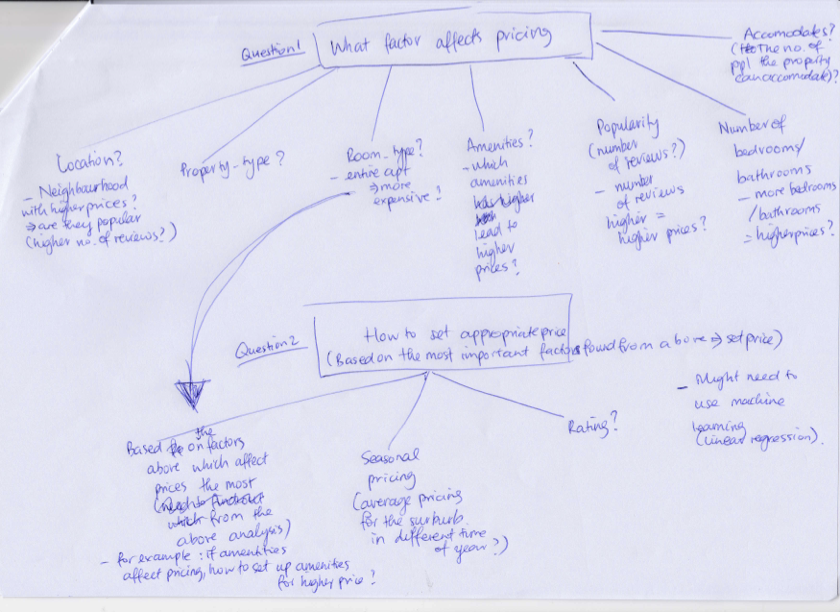

### Our target audience will be property owners New York (one of the most expensive cities in the world) who want to become hosts on AirBnB.

As our data contains details of listings, as well as their reviews and pricing, one can take a closer look to see how to set a listing strategy to improve rating score as well as boosting revenue from AirBnB properties.


### The datasets required to answer the big questions

We decided to get information about all AirBnB listings in:

- New York

We chose New York because it is in the list of most expensive cities in the world( *). Property owners in these cities have to pay higher expenses for owning a property (higher maintainence fees, land tax, utilities etc.)* (**), therefore their AirBnB listings have to generate enough revenue to not only break even but also make profits.  

(*) Source: https://globetrender.com/2022/01/06/tel-aviv-ranked-most-expensive-city-world-2021/

(**)Sources: https://streeteasy.com/blog/buying-a-home-in-nyc-everything-you-need-to-know/

https://www.home-hunts.com/blog/hidden-costs-of-buying-property-in-france/

Each of the cities contain the following datasets:

* `listings.csv.gz`: detailed information about listings
* `listings.csv`: a compact version of `listings.csv.gz`
* `reviews.csv.gz`: detailed information about reviews of listings in the area
* `reviews.csv`: a compact version of `reviews.csv.gz`
* `calendar.csv.gz`: information about availability of a listings in the next 365 days
* `neighbourhoods.csv`: a list of wards and their corrensponding districts
* `neighbourhoods.geojson`: useful for geo plot



# Data cleaning

## Detailed Calendar

In [ ]:
def dcalendar_clean(df):
  # remove the '$', ', ' in all prices
  df['adjusted_price'].replace({'\$': ''}, regex=True, inplace=True)
  df['adjusted_price'].replace({'\,': ''}, regex=True, inplace=True)
  df['price'].replace({'\$': ''}, regex=True, inplace=True)
  df['price'].replace({'\,': ''}, regex=True, inplace=True)
  df['date'] = pd.to_datetime(df['date'])

  #replace 'f' and 't' to '0' and '1' respectively
  df.replace('f', 0, inplace=True)
  df.replace('t', 1, inplace=True)
  return df

## Detailed Reviews

In [ ]:
def dreviews_clean(df):
  #convert column to proper datatype
  df['date'] = pd.to_datetime(df['date'])

  #drop all rows with null values
  df.dropna(inplace=True)
  return df

### Cleaning 'comments' column

In [ ]:
#Download text clean package
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words("english")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Apply clean_text for each row (RMB TO CHANGE THE NAME OF THE CITY):
def clean_text(comment):
    # Remove HTML
    raw = BeautifulSoup(comment, "html.parser")
    raw = raw.get_text()

    # Remove non-alphabetic & lower
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()

    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if word not in stops]
    return ' '.join(clean)

### Counting words

In [ ]:
# Counting words - Pls Change name of the city:
result_dict = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in result_dict:
            result_dict[word] = 1
        else:
            result_dict[word] += 1

### Polarity (positive or negative?)

In [ ]:
from textblob import TextBlob

def text_polarity(row):
  return TextBlob(row).polarity

## Detailed Listings

In [ ]:
def dlistings_remove_cols(df):
  #delete unnecessary columns
  irre_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
               'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time',
               'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
               'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
               'host_identity_verified', 'neighbourhood',
               'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
               'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
               'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_updated',
               'has_availability', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
               'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count',
               'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
               'calculated_host_listings_count_shared_rooms']
  df.drop(columns = irre_cols, inplace=True)
  return df

In [ ]:
def dlistings_fillna(df):
  # Calculations for filling nulls in column 'beds'
  df['bedsPP'] = df['beds']/df['accommodates']
  # Takes mean of beds-per-person for each room type
  beds_fill = (df.groupby('room_type')['bedsPP'].transform(lambda x: x.fillna(x.mean())) * df['accommodates']).round(0)

  # Calculating number of baths from bathrooms_text
  baths_fill = df['bathrooms_text'].str.lower().str.replace('half','0.5').str.extract(r'(\d?(?:\d.)?\d)')[0].astype(float)

  # beds, bedrooms, bathrooms fill with median
  rooms = ['bathrooms', 'bedrooms']
  for column in rooms:
      df[column] = df[column].fillna(df[column].median())

  null_fill = {'host_response_rate' : '100%',
             'host_is_superhost' : 'f',
             'beds': beds_fill,
             'bathrooms': baths_fill,
             'review_scores_rating' : 0,
             'review_scores_accuracy' : 0,
             'review_scores_cleanliness' : 0,
             'review_scores_checkin' : 0,
             'review_scores_communication' : 0,
             'review_scores_location' : 0,
             'review_scores_value' : 0,
             'reviews_per_month' : 0}

  df.fillna(value=null_fill, inplace=True)
  return df

In [ ]:
def dlistings_rooms(df):
  # process the bathrooms_text
  df['bathrooms_text'] = df['bathrooms_text'].replace({'( baths| bath)':'',
                                                      'Private half-bath':'0.5 private',
                                                      'Shared half-bath': '0.5 shared',
                                                      'Half-bath': '0.5'}, regex = True)
  df['shared_bathroom'] = df['bathrooms_text'].str.contains('shared')
  df['bathrooms'] = df['bathrooms_text'].replace({'(private|shared)':'',' ':''}, regex = True).astype('float')
  df.drop(columns=['bathrooms_text', 'bedsPP'],inplace=True)
  df.dropna(subset=['bathrooms'], inplace=True) #drop rows without bathrooms
  return df

In [ ]:
def dlistings_amenities(df):
  #clean amenities, too many sparse values
  df['amenities'] = df['amenities'].str.replace('{','')
  df['amenities'] = df['amenities'].str.replace('}','')
  df['amenities'] = df['amenities'].str.replace('"','')
  df['amenities'] = df['amenities'].str.replace("''",'')
  df['amenities'] = df['amenities'].str.upper()

  df['AIR CONDITIONING'] = df['amenities'].str.contains('AIR CONDITIONING|CENTRAL AIR CONDITIONING', regex = True)
  df['BABY ACCOMODATIONS'] = df['amenities'].str.contains('BABY BATH|BABY MONITOR|BABYSITTER RECOMMMENDATIONS|CRIB', regex = True)
  df['BEDROOM ESSENTIALS'] = df['amenities'].str.contains('PILLOW-TOP MATTRESS|MEMORY FOAM MATTRESS|BED LINENS|BEDROOM COMFORTS|EXTRA PILLOWS AND BLANKETS|FIRM MATTRESS', regex = True)
  df['BATHROOM ESSENTIALS'] = df['amenities'].str.contains('TOILET PAPER|TOILET|BATH TOWEL|BATHROOM ESSENTIALS|BATHTUB|BATHTUB WITH BATH CHAIR|BODY SOAP, HAIR DRYER|SHAMPOO, SHOWER GEL', regex = True)
  df['ENTERTAINMENT'] = df['amenities'].str.contains('CABLE TV|HBO GO|NETFLIX|SMART TV|TV|GAME CONSOLE|APPLE TV', regex = True)
  df['KITCHEN ESSENTIALS'] = df['amenities'].str.contains('STOVE|REFRIDGERATOR|MICROWAVE|OVEN|MICROWAVE,OVEN|KITCHEN|KITCHENETTE COOKING BASICS|CONVECTION OVEN|COFFEE MAKER|BREAD MAKER|BARBECUE UTENSILS|BBQ GRILL|DISHES AND SILVERWARE|DOUBLE OVEN|ESPRESSO MACHINE|FULL KITCHEN|GAS OVEN', regex = True)
  df['KITCHEN EXTRA'] = df['amenities'].str.contains('DISHWASHER|DRYER|WASHER|TRASH CAN|WASHER/DRYER', regex = True)
  df['CHILDREN ACCOMODATIONS'] = df['amenities'].str.contains('CHILDRENS BOOKS AND TOYS|CHILDRENS DINNERWARE', regex = True)
  df['INTERNET'] = df['amenities'].str.contains('ETHERNET CONNECTION|INTERNET|POCKET WIFI|WIFI', regex = True)
  df['FITNESS EQUIPMENT'] = df['amenities'].str.contains('EXERCISE EQUIPMENT|GYM', regex = True)
  df['SAFETY'] = df['amenities'].str.contains('FIRE EXTINGUISHER|FIREPLACE GUARDS|FIRST AID KIT', regex = True)
  df['BACKYARD'] = df['amenities'].str.contains('GARDEN|BACKYARD', regex = True)
  df['BALCONY'] = df['amenities'].str.contains('PATIO|BALCONY', regex = True)
  df['PETS ALLOWED'] = df['amenities'].str.contains('PETS ALLOWED|PETS LIVE ON THIS PROPERTY', regex = True)
  df['FREE PARKING'] = df['amenities'].str.contains('FREE PARKING ON PREMISES|FREE STREET PARKING|OUTDOOR PARKING', regex = True)
  df['HEATING'] = df['amenities'].str.contains('HEATED FLOORS|HEATING|HOT WATER|HOT TUB|INDOOR FIREPLACE', regex = True)
  df['POOL'] = df['amenities'].str.contains('POOL', regex = True)
  df['SMOKING ALLOWED'] = df['amenities'].str.contains('SMOKING ALLOWED', regex = True)
  df['WHEELCHAIR ACCESSIBLE'] = df['amenities'].str.contains('WHEELCHAIR ACCESSIBLE', regex = True)

  return df

In [ ]:
def dlistings_format_cols(df):
  df['beds'] = df['beds'].astype('int')
  df['price'] = df['price'].str.replace(r'[$,]', '').astype('float')
  df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('int')

  # format discrete
  df['accommodates'] = df['accommodates'].astype('uint16')
  return df

In [ ]:
with gzip.open(PATH_TO_DB + 'New York/listings.csv.gz') as f:
	NYC_dlistings = pd.read_csv(f)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
NYC_dlistings = dlistings_remove_cols(NYC_dlistings)
NYC_dlistings = dlistings_fillna(NYC_dlistings)
NYC_dlistings = dlistings_rooms(NYC_dlistings)
NYC_dlistings = dlistings_amenities(NYC_dlistings)
NYC_dlistings = dlistings_format_cols(NYC_dlistings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
NYC_dlistings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38170 entries, 0 to 38276
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38170 non-null  int64  
 1   picture_url                   38170 non-null  object 
 2   host_id                       38170 non-null  int64  
 3   host_response_rate            38170 non-null  int64  
 4   host_is_superhost             38170 non-null  object 
 5   neighbourhood_cleansed        38170 non-null  object 
 6   neighbourhood_group_cleansed  38170 non-null  object 
 7   latitude                      38170 non-null  float64
 8   longitude                     38170 non-null  float64
 9   property_type                 38170 non-null  object 
 10  room_type                     38170 non-null  object 
 11  accommodates                  38170 non-null  uint16 
 12  bathrooms                     38170 non-null  float64
 13  b

# Insights

## Detailed Listings

### Number of amenities

In [ ]:
NYC_dlistings['amenities']

0        [EXTRA PILLOWS AND BLANKETS, BAKING SHEET, LUG...
1        [EXTRA PILLOWS AND BLANKETS, LUGGAGE DROPOFF A...
3        [KITCHEN, BBQ GRILL, CABLE TV, CARBON MONOXIDE...
4        [ROOM-DARKENING SHADES, LOCK ON BEDROOM DOOR, ...
5        [BREAKFAST, CARBON MONOXIDE ALARM, FIRE EXTING...
                               ...                        
38271    [AIR CONDITIONING, FIRE EXTINGUISHER, DEDICATE...
38272    [FIRE EXTINGUISHER, COOKING BASICS, CARBON MON...
38273    [FIRE EXTINGUISHER, COOKING BASICS, CARBON MON...
38274    [HANGERS, LONG TERM STAYS ALLOWED, FIRE EXTING...
38276    [STAINLESS STEEL ELECTRIC STOVE, SECURITY CAME...
Name: amenities, Length: 38170, dtype: object

In [ ]:
NYC_dlistings['beds'].value_counts()

1     24926
2      8242
3      2923
4      1221
5       412
6       217
7        85
8        50
9        42
11       14
12       13
10       12
16        4
17        3
13        3
18        1
21        1
24        1
Name: beds, dtype: int64

In [ ]:
def get_num_amenities(s):
    return len(s.split(','))

NYC_dlistings['num_amenities'] = NYC_dlistings['amenities'].apply(get_num_amenities)
NYC_dlistings['num_amenities']

0        31
1        35
3        14
4        25
5        16
         ..
38271    17
38272    15
38273    15
38274    17
38276    38
Name: num_amenities, Length: 38170, dtype: int64

In [ ]:
NYC_dlistings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38170 entries, 0 to 38276
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38170 non-null  int64  
 1   picture_url                   38170 non-null  object 
 2   host_id                       38170 non-null  int64  
 3   host_response_rate            38170 non-null  int64  
 4   host_is_superhost             38170 non-null  object 
 5   neighbourhood_cleansed        38170 non-null  object 
 6   neighbourhood_group_cleansed  38170 non-null  object 
 7   latitude                      38170 non-null  float64
 8   longitude                     38170 non-null  float64
 9   property_type                 38170 non-null  object 
 10  room_type                     38170 non-null  object 
 11  accommodates                  38170 non-null  uint16 
 12  bathrooms                     38170 non-null  float64
 13  b

### Remove outliers

In [ ]:
q1 = NYC_dlistings['price'].quantile(0.25)
q3 = NYC_dlistings['price'].quantile(0.75)
IQR = q3 - q1
Lower_bound = q1 - 3 * IQR
Upper_bound = q3 + 3 * IQR
print(q1, q3, IQR, Lower_bound, Upper_bound)

70.0 189.0 119.0 -287.0 546.0


In [ ]:
outliers = NYC_dlistings[((NYC_dlistings['price'] < Lower_bound) | (NYC_dlistings['price'] > Upper_bound))]
# outliers['price'].max()
outliers['price'].min()
# len(outliers['price'])


547.0

In [ ]:
import numpy as np

In [ ]:
NYC_dlistings.loc[NYC_dlistings['price'] > Upper_bound] = np.nan

### Add revenue column

In [ ]:
NYC_dlistings['revenue'] = NYC_dlistings['price'] * NYC_dlistings['number_of_reviews']

### Effect of neighbourhood

In [ ]:
with open(PATH_TO_DB + 'New York/neighbourhoods.csv') as f:
		NYC_neighbourhoods = pd.read_csv(f)
with open(PATH_TO_DB + 'New York/neighbourhoods.geojson') as f:
    NYC_gjneighbourhoods = geojson.load(f)

In [ ]:
NYC_neighbourhoods

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
...,...,...
225,Staten Island,Tottenville
226,Staten Island,West Brighton
227,Staten Island,Westerleigh
228,Staten Island,Willowbrook


In [ ]:
NYC_dlistings[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude']]

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
0,Midtown,Manhattan,40.753560,-73.985590
1,Bedford-Stuyvesant,Brooklyn,40.684940,-73.957650
3,Sunset Park,Brooklyn,40.662650,-73.994540
4,Midtown,Manhattan,40.764570,-73.983170
5,Upper West Side,Manhattan,40.803800,-73.967510
...,...,...,...,...
38271,Kensington,Brooklyn,40.643656,-73.981589
38272,Port Richmond,Staten Island,40.632222,-74.136715
38273,Port Richmond,Staten Island,40.630502,-74.136142
38274,Midtown,Manhattan,40.753887,-73.980536


In [ ]:
price_by_neighbourhood = NYC_dlistings.groupby('neighbourhood_cleansed')[['price', 'id']].agg(({'price': 'mean', 'id':'count'}))
price_by_neighbourhood.sort_values(by='id', ascending=False)

,price,id
neighbourhood_cleansed,,
Bedford-Stuyvesant,110.362689,2782
Williamsburg,138.834450,2537
Harlem,114.360579,1933
Bushwick,87.628811,1673
Hell's Kitchen,187.783066,1618
...,...,...
Neponsit,295.000000,1
Castle Hill,72.000000,1
Lighthouse Hill,150.000000,1


In [ ]:
boroughs_price = NYC_dlistings.groupby(['neighbourhood_group_cleansed']).describe()['price']
boroughs_price.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Manhattan,15772.0,167.966713,102.252143,10.0,94.0,145.0,215.00,546.0
Brooklyn,14437.0,121.168941,84.680991,10.0,60.0,97.0,151.00,542.0
Queens,5246.0,99.635341,74.797926,10.0,50.0,75.0,120.00,528.0
Bronx,1092.0,99.871795,71.325875,11.0,53.0,75.0,121.25,450.0
Staten Island,348.0,105.037356,71.888172,31.0,60.0,85.5,123.50,504.0


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
def bar(x,y,color,title,xlabel,ylabel):
    fig = px.bar(x=x, y=y, color=color)

    fig.update_layout(
    title = title,
    xaxis_title=xlabel,
    yaxis_title=ylabel)

    fig.show()

In [ ]:
bar(x=boroughs_price.index, y= boroughs_price['mean'], color=boroughs_price.index,
   title = 'Average Price of Airbnb by Boroughs', xlabel='Boroughs', ylabel='Average Price')

In [ ]:
NYC_dlistings['review_scores_rating'].value_counts()

0.00    9545
5.00    8410
4.00    1167
4.50    1073
4.67     886
        ... 
4.02       1
3.30       1
2.89       1
3.17       1
3.64       1
Name: review_scores_rating, Length: 153, dtype: int64

In [ ]:
# map_metro = NYC_dlistings[NYC_dlistings['neighbourhood_group_cleansed'] == 'Manhattan']
map_metro = NYC_dlistings.copy()
# Filter out listings that have no score ratings
map_data1 = map_metro[(map_metro['review_scores_rating']>0) & (map_metro['number_of_reviews']>0)].groupby('neighbourhood_cleansed').agg(
    avg_rating=('review_scores_rating','mean'), avg_reviews_per_month=('reviews_per_month','mean'),
    no_of_reviews=('number_of_reviews', 'sum')).reset_index()
# Keep all listings for counting and taking the median price
map_data2 = map_metro.groupby('neighbourhood_cleansed').agg(count_id=('id','count'),
                                         mean_price=('price','mean')).reset_index()
# Joining those tables to put everything in one table
map_data = map_data2.merge(map_data1,how='left',on='neighbourhood_cleansed')

map_data['mean_price'] = map_data['mean_price'].round(2)
map_data['avg_reviews_per_month'] = map_data['avg_reviews_per_month'].round(2)
map_data['avg_rating'] = map_data['avg_rating'].round(2)
map_data.sort_values('no_of_reviews', ascending=False)

,neighbourhood_cleansed,count_id,mean_price,avg_rating,avg_reviews_per_month,no_of_reviews
12,Bedford-Stuyvesant,2782,110.36,4.68,1.89,87351.0
215,Williamsburg,2537,138.83,4.74,1.08,54329.0
95,Harlem,1933,114.36,4.69,1.53,53999.0
27,Bushwick,1673,87.63,4.65,1.86,34365.0
96,Hell's Kitchen,1618,187.78,4.57,1.77,30313.0
...,...,...,...,...,...,...
209,West Farms,5,94.20,3.17,1.58,11.0
117,Little Neck,4,79.25,4.88,0.22,10.0
175,Sea Gate,7,111.71,5.00,0.73,9.0
88,Graniteville,1,40.00,4.60,2.59,5.0


### Effect of amenities on rating

In [ ]:
NYC_copy = NYC_dlistings.copy()

In [ ]:
NYC_copy.head()

,id,picture_url,host_id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,BACKYARD,BALCONY,PETS ALLOWED,FREE PARKING,HEATING,POOL,SMOKING ALLOWED,WHEELCHAIR ACCESSIBLE,num_amenities,revenue
0,2595.0,https://a0.muscache.com/pictures/f0813a11-40b2...,2845.0,80.0,f,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,...,False,False,False,True,True,False,False,False,31.0,7200.0
1,3831.0,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869.0,9.0,f,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,...,False,False,False,True,True,False,False,False,35.0,30675.0
3,5136.0,https://a0.muscache.com/pictures/miso/Hosting-...,7378.0,100.0,f,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,...,False,False,False,False,True,False,False,False,14.0,550.0
4,5178.0,https://a0.muscache.com/pictures/12065/f070997...,8967.0,100.0,f,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,...,False,False,False,True,True,False,False,False,25.0,34476.0
5,5203.0,https://a0.muscache.com/pictures/103776/b37157...,7490.0,100.0,f,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,...,False,False,False,True,True,False,False,False,16.0,8850.0


In [ ]:
# cols = list(NYC_copy.columns)
# cols = cols[26:-2]
# cols

In [ ]:
# for col in cols:
#   print(col, ": ", NYC_copy['price'].corr(NYC_copy[col]))

In [ ]:
# NYC_copy.groupby(['accommodates','room_type']).agg(mean_ppp=('ppp','mean'), count=('id', 'count')).reset_index()

In [ ]:
test = NYC_copy.groupby(['KITCHEN ESSENTIALS']).agg(revenue=('revenue','sum'),
                                             reviews=('number_of_reviews', 'sum')).reset_index()
test

,KITCHEN ESSENTIALS,revenue,reviews
0,False,6645642.0,40628.0
1,True,110944545.0,833123.0


In [ ]:
NYC_copy

,id,picture_url,host_id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,BACKYARD,BALCONY,PETS ALLOWED,FREE PARKING,HEATING,POOL,SMOKING ALLOWED,WHEELCHAIR ACCESSIBLE,num_amenities,revenue
0,2595.0,https://a0.muscache.com/pictures/f0813a11-40b2...,2845.0,80.0,f,Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,...,False,False,False,True,True,False,False,False,31.0,7200.0
1,3831.0,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869.0,9.0,f,Bedford-Stuyvesant,Brooklyn,40.684940,-73.957650,Entire guest suite,...,False,False,False,True,True,False,False,False,35.0,30675.0
3,5136.0,https://a0.muscache.com/pictures/miso/Hosting-...,7378.0,100.0,f,Sunset Park,Brooklyn,40.662650,-73.994540,Entire rental unit,...,False,False,False,False,True,False,False,False,14.0,550.0
4,5178.0,https://a0.muscache.com/pictures/12065/f070997...,8967.0,100.0,f,Midtown,Manhattan,40.764570,-73.983170,Private room in rental unit,...,False,False,False,True,True,False,False,False,25.0,34476.0
5,5203.0,https://a0.muscache.com/pictures/103776/b37157...,7490.0,100.0,f,Upper West Side,Manhattan,40.803800,-73.967510,Private room in rental unit,...,False,False,False,True,True,False,False,False,16.0,8850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38271,53660977.0,https://a0.muscache.com/pictures/bb3c1374-38be...,363928053.0,100.0,f,Kensington,Brooklyn,40.643656,-73.981589,Private room in residential home,...,False,False,False,False,True,False,False,False,17.0,0.0
38272,53662330.0,https://a0.muscache.com/pictures/e2d56c2f-259b...,100146245.0,97.0,f,Port Richmond,Staten Island,40.632222,-74.136715,Private room in residential home,...,False,False,False,False,True,False,False,False,15.0,0.0
38273,53662542.0,https://a0.muscache.com/pictures/05f218bd-04ff...,100146245.0,97.0,f,Port Richmond,Staten Island,40.630502,-74.136142,Private room in residential home,...,False,False,False,False,True,False,False,False,15.0,0.0
38274,53662772.0,https://a0.muscache.com/pictures/b4d3d4bf-cffa...,337879004.0,94.0,f,Midtown,Manhattan,40.753887,-73.980536,Private room in serviced apartment,...,False,False,False,False,True,False,False,False,17.0,0.0


In [ ]:
NYC_copy.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
NYC_copy

In [ ]:
cols = list(NYC_copy.columns)

In [ ]:
id_vars = cols[:26]
id_vars.append(cols[-1])

value_vars = cols[26:-2]

In [ ]:
id_vars

['id',
 'picture_url',
 'host_id',
 'host_response_rate',
 'host_is_superhost',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'revenue']

In [ ]:
borough_rooms_price = NYC_copy.groupby(['room_type','neighbourhood_group_cleansed']).mean()['price'].unstack()
borough_rooms_price

neighbourhood_group_cleansed,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,144.493119,169.058333,199.090377,152.791916,136.810056
Hotel room,NaN,217.000000,270.901961,171.111111,NaN
Private room,70.675159,72.183853,118.330384,66.559566,71.571429
Shared room,59.892857,58.101064,97.797414,64.254902,40.000000


In [ ]:
test = pd.melt(NYC_copy, id_vars=id_vars, value_vars=value_vars)
test.groupby(['value', 'variable']).agg(revenue=('revenue','sum')).unstack()

revenue                                             \
variable AIR CONDITIONING BABY ACCOMODATIONS    BACKYARD     BALCONY   
value                                                                  
False           8592473.0        100349666.0  95315548.0  94149062.0   
True          108997714.0         17240521.0  22274639.0  23441125.0   

                                                                        \
variable BATHROOM ESSENTIALS BEDROOM ESSENTIALS CHILDREN ACCOMODATIONS   
value                                                                    
False             86637782.0         44440959.0            117590187.0   
True              30952405.0         73149228.0                    NaN   

                                                                    \
variable ENTERTAINMENT FITNESS EQUIPMENT FREE PARKING      HEATING   
value                                                                
False       19782117.0       110331538.0   37591183.0     640672.0   
True        97808070.0         7258649.0   79999004.0  116949515.0   

                                                                     \
variable     INTERNET KITCHEN ESSENTIALS KITCHEN EXTRA PETS ALLOWED   
value                                                                 
False        616124.0          6645642.0     8391121.0  117590187.0   
True      116974063.0        110944545.0   109199066.0          NaN   

                                                                         \
variable         POOL      SAFETY SMOKING ALLOWED WHEELCHAIR ACCESSIBLE   
value                                                                     
False     116001212.0  35177439.0     117590187.0           117590187.0   
True        1588975.0  82412748.0             NaN                   NaN   

                          
variable shared_bathroom  
value                     
False         96622454.0  
True          20967733.0

In [ ]:
test.groupby(['value', 'variable']).sum()['revenue'].unstack()

variable,AIR CONDITIONING,BABY ACCOMODATIONS,BACKYARD,BALCONY,BATHROOM ESSENTIALS,BEDROOM ESSENTIALS,CHILDREN ACCOMODATIONS,ENTERTAINMENT,FITNESS EQUIPMENT,FREE PARKING,HEATING,INTERNET,KITCHEN ESSENTIALS,KITCHEN EXTRA,PETS ALLOWED,POOL,SAFETY,SMOKING ALLOWED,WHEELCHAIR ACCESSIBLE,shared_bathroom
value,,,,,,,,,,,,,,,,,,,,
False,8592473.0,100349666.0,95315548.0,94149062.0,86637782.0,44440959.0,117590187.0,19782117.0,110331538.0,37591183.0,640672.0,616124.0,6645642.0,8391121.0,117590187.0,116001212.0,35177439.0,117590187.0,117590187.0,96622454.0
True,108997714.0,17240521.0,22274639.0,23441125.0,30952405.0,73149228.0,NaN,97808070.0,7258649.0,79999004.0,116949515.0,116974063.0,110944545.0,109199066.0,NaN,1588975.0,82412748.0,NaN,NaN,20967733.0


In [ ]:
tmp = test.groupby(['value', 'variable']).sum()['revenue'].unstack()

rows = 5
cols = 4
height = 400 * rows
subplot_titles = value_vars


xaxis_title="True/False"
yaxis_title="Revenue"

fig = make_subplots(rows=rows,cols=cols, subplot_titles=subplot_titles)

for i, col in enumerate(subplot_titles):
    r = int(np.ceil(((i+1)/cols)))
    c = i%4+1

    fig.append_trace(go.Bar(
    x=tmp[col].index,
    y=tmp[col].values
    ), row = r, col=c)
    fig.update_xaxes(title_text=xaxis_title, row=r, col=c)

fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1300,
    height=height,
    title={
    'text':'<b>Test</b>',
         'y':0.975,
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top'
    })

fig.show()

In [ ]:
# for col in cols:
#   test = NYC_copy.groupby([col]).agg(revenue=('revenue','sum'),
#                                              reviews=('number_of_reviews', 'sum')).reset_index()
#   print(px.pie(values=test['revenue'],
#        names =test[col],
#        title =col))

In [ ]:
# rows = 5
# cols = 4
# height = 400 * rows
# subplot_titles = cols

In [ ]:
# px.pie(values=test['revenue'],
#        names =test['KITCHEN ESSENTIALS'],
#        title ='KITCHEN ESSENTIALS')

In [ ]:
# for col in cols:
#   print(NYC_copy.groupby([col]).agg(revenue=('revenue','sum'),
#                                     reviews=('number_of_reviews', 'sum')).reset_index())
#   print("\n")

### Effect of room and accomodate on price

In [ ]:
NYC_dlistings['room_type'].value_counts()

Entire home/apt    19499
Private room       16729
Shared room          551
Hotel room           116
Name: room_type, dtype: int64

In [ ]:
NYC_dlistings.groupby('room_type').mean()[['price']].round()

,price
room_type,
Entire home/apt,181.0
Hotel room,261.0
Private room,87.0
Shared room,76.0


In [ ]:
NYC_dlistings.groupby('beds')['price'].mean()

beds
1.0     112.468573
2.0     169.172676
3.0     206.558224
4.0     223.208022
5.0     247.425220
6.0     252.486301
7.0     312.968750
8.0     224.444444
9.0     387.850000
10.0    263.375000
11.0    331.800000
12.0    260.400000
16.0    398.666667
21.0     66.000000
24.0    173.000000
Name: price, dtype: float64

In [ ]:
NYC_dlistings.groupby(['room_type', 'accommodates']).sum()['revenue'].unstack()

accommodates,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
room_type,,,,,,,,,,,,,,,,
Entire home/apt,738179.0,22469297.0,9674860.0,22059558.0,7722666.0,10476647.0,2463452.0,3520886.0,488542.0,769965.0,374657.0,679510.0,24318.0,132147.0,20992.0,338082.0
Hotel room,122745.0,1602136.0,13672.0,157662.0,NaN,4125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private room,4928222.0,22782936.0,1955910.0,2377853.0,451038.0,223195.0,54798.0,146383.0,3311.0,102445.0,864.0,1080.0,1872.0,NaN,548.0,28314.0
Shared room,267634.0,207482.0,68203.0,109077.0,5459.0,18465.0,NaN,800.0,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NYC_dlistings.groupby(['accommodates','room_type']).agg(revenue=('revenue','mean'), count=('id', 'count')).unstack()

revenue                                          \
room_type    Entire home/apt    Hotel room Private room  Shared room   
accommodates                                                           
1.0              1315.827094  24549.000000   874.573558   901.124579   
2.0              3061.212125  18629.488372  2378.425305  1146.309392   
3.0              3246.597315   1953.142857  3201.162029  1705.075000   
4.0              4576.671784   9274.235294  3372.841135  4742.478261   
5.0              5707.809313           NaN  6264.416667  1091.800000   
6.0              6984.431333   4125.000000  3381.742424  6155.000000   
7.0              8379.088435           NaN  4566.500000          NaN   
8.0              9074.448454           NaN  6364.478261   800.000000   
9.0             12213.550000           NaN  1655.500000          NaN   
10.0             7333.000000           NaN  9313.181818   200.000000   
11.0            22038.647059           NaN   864.000000          NaN   
12.0            13323.725490           NaN  1080.000000          NaN   
13.0             3039.750000           NaN   936.000000          NaN   
14.0            18878.142857           NaN          NaN          NaN   
15.0             6997.333333           NaN   548.000000          NaN   
16.0            10565.062500           NaN  3539.250000          NaN   

                       count                                      
room_type    Entire home/apt Hotel room Private room Shared room  
accommodates                                                      
1.0                    561.0        5.0       5635.0       297.0  
2.0                   7340.0       86.0       9579.0       181.0  
3.0                   2980.0        7.0        611.0        40.0  
4.0                   4820.0       17.0        705.0        23.0  
5.0                   1353.0        NaN         72.0         5.0  
6.0                   1500.0        1.0         66.0         3.0  
7.0                    294.0        NaN         12.0         NaN  
8.0                    388.0        NaN         23.0         1.0  
9.0                     40.0        NaN          2.0         NaN  
10.0                   105.0        NaN         11.0         1.0  
11.0                    17.0        NaN          1.0         NaN  
12.0                    51.0        NaN          1.0         NaN  
13.0                     8.0        NaN          2.0         NaN  
14.0                     7.0        NaN          NaN         NaN  
15.0                     3.0        NaN          1.0         NaN  
16.0                    32.0        NaN          8.0         NaN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [ ]:
# tmp = NYC_dlistings.groupby(['accommodates','room_type', 'neighbourhood_group_cleansed']).mean()['revenue'].unstack().reset_index()
# tmp.drop(tmp[tmp['room_type'] == 'Hotel room'].index, inplace = True)

In [ ]:
# tmp.fillna(0, inplace=True)
# tmp

In [ ]:
tmp = NYC_dlistings.groupby(['accommodates','room_type', 'neighbourhood_group_cleansed']).agg(revenue=('revenue','mean'), count=('id', 'count')).reset_index()
tmp

,accommodates,room_type,neighbourhood_group_cleansed,revenue,count
0,1.0,Entire home/apt,Bronx,1045.300000,10
1,1.0,Entire home/apt,Brooklyn,2190.166667,120
2,1.0,Entire home/apt,Manhattan,1158.313472,386
3,1.0,Entire home/apt,Queens,399.142857,42
4,1.0,Entire home/apt,Staten Island,344.333333,3
...,...,...,...,...,...
146,16.0,Entire home/apt,Manhattan,0.000000,3
147,16.0,Entire home/apt,Queens,8589.250000,8
148,16.0,Private room,Bronx,330.000000,1
149,16.0,Private room,Brooklyn,5596.800000,5


In [ ]:
plot_data = tmp[(tmp['neighbourhood_group_cleansed'] == 'Manhattan')]
plot_data.head()

,accommodates,room_type,neighbourhood_group_cleansed,revenue,count
2,1.0,Entire home/apt,Manhattan,1158.313472,386
5,1.0,Hotel room,Manhattan,24549.000000,5
8,1.0,Private room,Manhattan,1102.294759,1927
13,1.0,Shared room,Manhattan,1501.160714,112
18,2.0,Entire home/apt,Manhattan,2554.039426,4109


Text(0.5, 1.0, 'Manhattan')

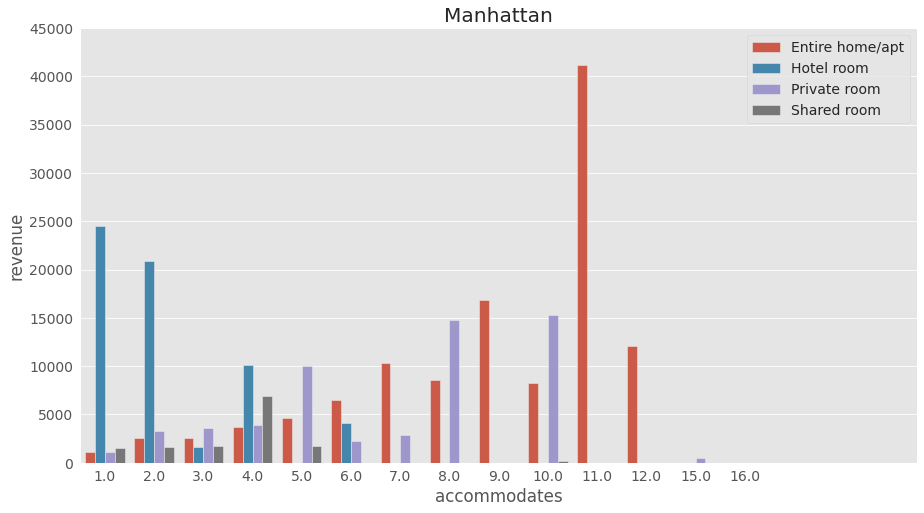

In [ ]:
plot_data = tmp[(tmp['neighbourhood_group_cleansed'] == 'Manhattan')]

plt.figure(figsize=(15,8))
sns.barplot(data=plot_data,
            x=plot_data['accommodates'],
            y=plot_data['revenue'],
            hue=plot_data['room_type'])
plt.xlim(-0.5, 16.5)
plt.ylim(0, 45000)
plt.legend(loc='upper right')
plt.title('Manhattan')

## dcalendar

In [ ]:
with gzip.open(PATH_TO_DB + 'New York/calendar.csv.gz') as f:
		NYC_dcalendar = pd.read_csv(f)

In [ ]:
NYC_dcalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.0,1125.0
1,65615,2021-12-05,f,$85.00,$85.00,10.0,1125.0
2,65615,2021-12-06,f,$85.00,$85.00,10.0,1125.0
3,65615,2021-12-07,f,$85.00,$85.00,10.0,1125.0
4,65615,2021-12-08,f,$85.00,$85.00,10.0,1125.0


In [ ]:
NYC_dcalendar = dcalendar_clean(NYC_dcalendar)
NYC_dcalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,0,150.00,150.00,30.0,1125.0
1,65615,2021-12-05,0,85.00,85.00,10.0,1125.0
2,65615,2021-12-06,0,85.00,85.00,10.0,1125.0
3,65615,2021-12-07,0,85.00,85.00,10.0,1125.0
4,65615,2021-12-08,0,85.00,85.00,10.0,1125.0


In [ ]:
NYC_dcalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13964535 entries, 0 to 13964534
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 745.8+ MB


### Availability rate

In [ ]:
# Change to datetime type
temp = NYC_dcalendar.copy()
temp.set_index('date', inplace=True)

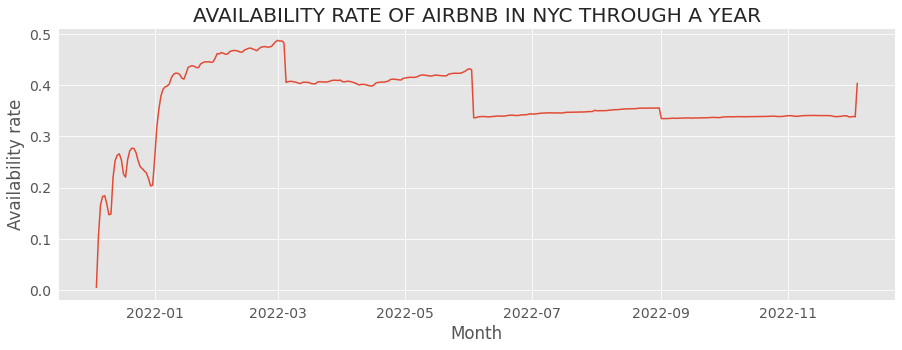

In [ ]:
# Booking rate of Airbnb through out the year
av_bytime = temp.resample('D').mean()['available'].reset_index()
plt.figure(figsize=(15,5))
plt.title('AVAILABILITY RATE OF AIRBNB IN NYC THROUGH A YEAR')
sns.lineplot(data=av_bytime,
             x='date',
             y='available')
plt.xlabel('Month')
plt.ylabel('Availability rate')
plt.show()

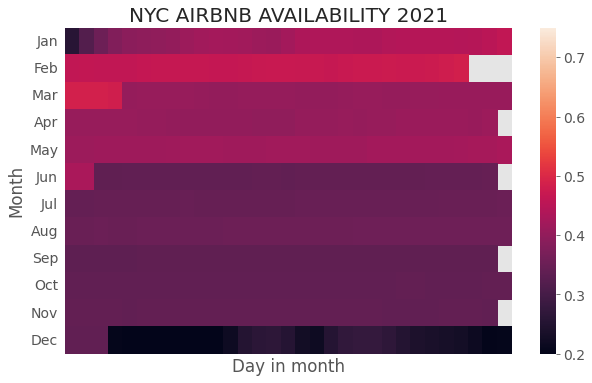

In [ ]:
temp_av_bytime = av_bytime.copy()
temp_av_bytime['month'] = temp_av_bytime['date'].astype('datetime64[D]').astype(str).apply(lambda x: int(x.split('-')[1]))
temp_av_bytime['day'] = temp_av_bytime['date'].astype('datetime64[D]').astype(str).apply(lambda x: int(x.split('-')[2]))
heatmap_data = temp_av_bytime.groupby(['month','day']).mean()['available'].unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,
            vmin=0.2,
            vmax=0.75,
            xticklabels=False,
            yticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.xlabel('Day in month')
plt.ylabel('Month')
plt.title('NYC AIRBNB AVAILABILITY 2021')
plt.show()



In [ ]:
def check_av(x):
    if x == 't':
        return 1
    else:
        return 0

In [ ]:
# Demand of room_type
df_booking = pd.merge(NYC_dcalendar, NYC_dlistings[['room_type','id']], left_on='listing_id', right_on='id')
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466675 entries, 0 to 13466674
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   room_type       object        
 8   id              float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.0+ GB


In [ ]:
df_booking['month_year'] = df_booking['date'].dt.to_period('M')
df_booking.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,room_type,id,month_year
0,2595,2021-12-05,0,150.00,150.00,30.0,1125.0,Entire home/apt,2595.0,2021-12
1,2595,2021-12-06,0,150.00,150.00,30.0,1125.0,Entire home/apt,2595.0,2021-12
2,2595,2021-12-07,0,150.00,150.00,30.0,1125.0,Entire home/apt,2595.0,2021-12
3,2595,2021-12-08,0,150.00,150.00,30.0,1125.0,Entire home/apt,2595.0,2021-12
4,2595,2021-12-09,0,150.00,150.00,30.0,1125.0,Entire home/apt,2595.0,2021-12


In [ ]:
temp = df_booking.copy()
rd_bytime = temp.groupby(['room_type','month_year']).mean()[['available']].reset_index()

In [ ]:
rd_bytime.head()

,room_type,month_year,available
0,Entire home/apt,2021-12,0.177260
1,Entire home/apt,2022-01,0.380862
2,Entire home/apt,2022-02,0.448398
3,Entire home/apt,2022-03,0.411505
4,Entire home/apt,2022-04,0.399947


In [ ]:
rd_bytime['month_year'] = rd_bytime['month_year'].astype('str')
rd_bytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   room_type   52 non-null     object 
 1   month_year  52 non-null     object 
 2   available   52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

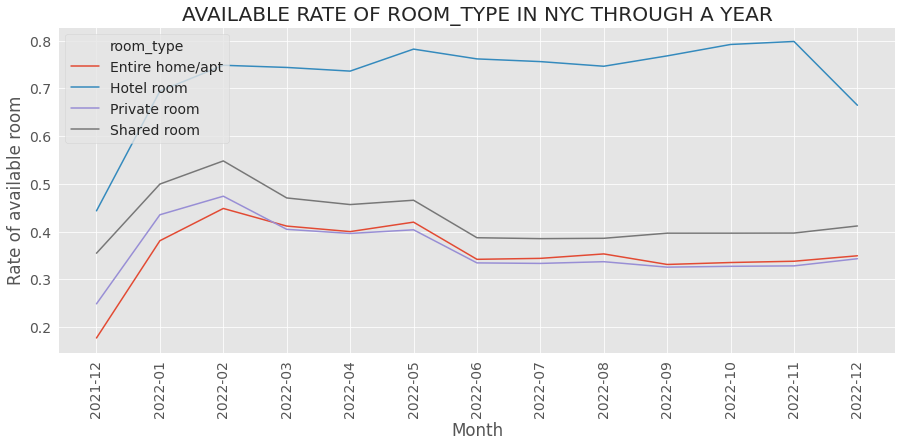

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('AVAILABLE RATE OF ROOM_TYPE IN NYC THROUGH A YEAR')
sns.lineplot(data=rd_bytime,
             x = 'month_year',
             y = 'available',
             hue = 'room_type')
plt.xlabel('Month')
plt.ylabel('Rate of available room')
plt.xticks(rotation=90)

## dreviews

In [ ]:
with gzip.open(PATH_TO_DB + 'New York/reviews.csv.gz') as f:
		nyc_dreviews = pd.read_csv(f)

In [ ]:
nyc_dreviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
nyc_dreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891964 entries, 0 to 891963
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     891964 non-null  int64 
 1   id             891964 non-null  int64 
 2   date           891964 non-null  object
 3   reviewer_id    891964 non-null  int64 
 4   reviewer_name  891958 non-null  object
 5   comments       891078 non-null  object
dtypes: int64(3), object(3)
memory usage: 40.8+ MB


In [ ]:
nyc_dreviews = nyc_dreviews.pipe(dreviews_clean)
nyc_dreviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
nyc_dreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891072 entries, 0 to 891963
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     891072 non-null  int64         
 1   id             891072 non-null  int64         
 2   date           891072 non-null  datetime64[ns]
 3   reviewer_id    891072 non-null  int64         
 4   reviewer_name  891072 non-null  object        
 5   comments       891072 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 47.6+ MB


### Extra dreviews (do not run)

In [ ]:
#Drop N/A values in the comments column:
nyc_dreviews = nyc_dreviews.dropna(subset = ['comments'])
nyc_dreviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
...,...,...,...,...,...,...
891959,53609786,508714999062086277,2021-12-02,56267284,Mathew,"Fantastic experience. Thank You, Sam! This apa..."
891960,53609786,509368869955553014,2021-12-03,184485667,Tamara,Immaculate unit in a great neighborhood. The a...
891961,53612732,509403683179062336,2021-12-03,65072448,Divya,Room is very small though it’s close to subway...
891962,53614162,508723153064804388,2021-12-02,60399002,Andy,Great stay! I wasn't sure what I was expecting...


In [ ]:
nyc_dreviews['clean'] = nyc_dreviews['comments'].apply(clean_text)
nyc_dreviews['clean']

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


KeyboardInterrupt: ignored

Count words:

In [ ]:
nyc_dreviews['clean'].apply(count_word)

In [ ]:
pd.Series(result_dict).sort_values(ascending=False).head(30)

Polarity (positive or negative)?

In [ ]:
nyc_dreviews['polarity'] = nyc_dreviews['clean'].apply(text_polarity)
nyc_dreviews.head()

In [ ]:
nyc_dreviews[nyc_dreviews['polarity'] == nyc_dreviews['polarity'].max()]

In [ ]:
#Total number of reviews:
# Bangkok_dreviews['id'].count()
# % of Negative reviews:
print(nyc_dreviews[nyc_dreviews['polarity'] < 0]['id'].count()/nyc_dreviews['id'].count())
# % of  Positive reviews:
print(nyc_dreviews[nyc_dreviews['polarity'] > 0]['id'].count()/nyc_dreviews['id'].count())
# % of neutral:
print(nyc_dreviews[nyc_dreviews['polarity'] == 0]['id'].count()/nyc_dreviews['id'].count())

In [ ]:
nyc_dreviews['polarity'].mean()